# Linear Support Vector Machines

## Classification Loss vs. Hinge Loss vs. Huberized Hinge Loss

<IPython.core.display.Javascript object>


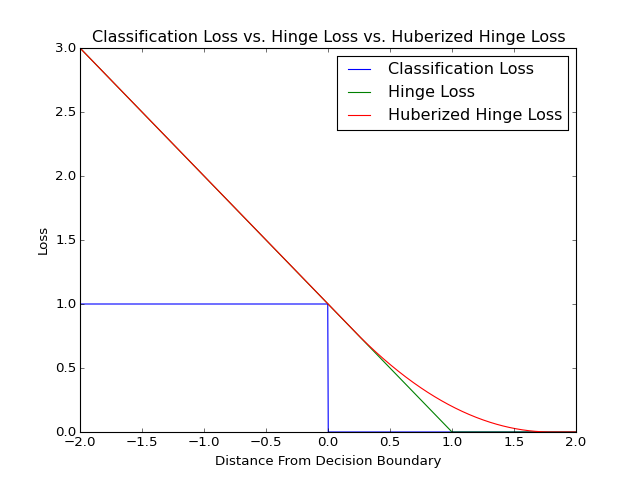

In [204]:
%matplotlib nbagg
plt.clf()
plt.cla()

import numpy as np
ax = plt.subplot(1,1,1)

x_plot=np.linspace(-2,2,1000)
y_plot1=x_plot.copy()
y_plot1[x_plot < 0]=1
y_plot1[x_plot == 0]=0
y_plot1[x_plot > 0]=0
plot1 = ax.plot(x_plot,y_plot1, label='Classification Loss')

y_plot2=np.maximum(np.zeros(x_plot.shape),1-x_plot.copy())
plot2 = ax.plot(x_plot,y_plot2, label='Hinge Loss')

h=.8
y_plot3= -1 * np.ones(x_plot.shape)
y_plot3[x_plot > 1+h]=0
y_plot3[x_plot < 1-h]=1-x_plot[x_plot < 1-h]
y_plot3[y_plot3 == -1]= ((1+h-x_plot[y_plot3 == -1])**2)/(4*h)
plot3 = ax.plot(x_plot,y_plot3, label='Huberized Hinge Loss')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels)
plt.title('Classification Loss vs. Hinge Loss vs. Huberized Hinge Loss')
plt.ylabel('Loss')
plt.xlabel('Distance From Decision Boundary')

## Analytic Expressions

Let $X \in R^{n \times d+1}$ and $y = (y_1,...,y_n)^T \in R^{n+1}$

Objective function: 
$$F(w) = \|w\|^2 + \frac Cn \|\texttt{loss}(y,Xw)\|_1$$

Clearly,
$$(\vec\nabla F(w))_j = 2w_j + \frac Cn \sum^{n}_{i=1}\frac{d}{d(Xw)_i}\texttt{loss}(y_i,(Xw)_i) \cdot X_{i,j} \quad \texttt{for} ~j = 1,2,...,d+1$$


For Hinge Loss:
$$l_{hinge}(y,t) := \max(0, 1 - yt)$$
Then
$$\frac{d}{dt}l_{hinge}(y,t) := \begin{cases} 0, & \mbox{if } 1-yt \lt 0\\ 
-y, & \mbox{if } 1-yt \gt 0  \end{cases}$$
And
$$F(w) = \|w\|^2 + \frac Cn \sum^n\max(0, 1 - y*(Xw))$$
Where $y*(Xw) \in R^{n}$<br />
And $\texttt{for j = 1,2,...,d+1}$
$$(\vec\nabla F(w))_j = \begin{cases} 2w_j, & \mbox{if } 1-yt \lt 0\\
2w_j + \frac Cn \sum^{n}_{i=1} -y \cdot X_{i,j}, & \mbox{if } 1-yt \gt 0  \end{cases}$$


Huberized Hinge Loss:
$$l_{huber-hinge}(y,t) := \begin{cases} 0, & \mbox{if } yt \gt 1+h\\ 
\frac{(1+h-yt)^2}{4h}, & \mbox{if } |1-yt| \le h \\ 
1-yt, & \mbox{if } yt \lt 1-h \end{cases}$$

$$\frac{d}{dt}l_{huber-hinge}(y,t) := \begin{cases} 0, & \mbox{if } yt \gt 1+h\\ 
\frac{2(1+h-yt)(-y)}{4h}, & \mbox{if } |1-yt| \le h \\ 
-y, & \mbox{if } yt \lt 1-h \end{cases}$$


We have continuity in $\frac{d}{dt}l_{huber-hinge}(y,t)$ since the derivatives limits' agree at the critical points;
$$ \lim_{t^+ \rightarrow \frac{1+h}{y} } \frac{d}{dt}l_{huber-hinge}(y,t) = 0$$
$$ \lim_{t^- \rightarrow \frac{1+h}{y} } \frac{d}{dt}l_{huber-hinge}(y,t) = \lim_{t^- \rightarrow \frac{1+h}{y} } \frac{2(1+h-yt)(-y)}{4h} = \lim_{t^- \rightarrow \frac{1+h}{y} } \frac{2(1+h-y\frac{1+h}{y})(-y)}{4h} = 0$$
So
$$ \lim_{t^+ \rightarrow \frac{1+h}{y} } \frac{d}{dt}l_{huber-hinge}(y,t) = \lim_{t^- \rightarrow \frac{1+h}{y} } \frac{d}{dt}l_{huber-hinge}(y,t)$$
And
$$ \lim_{t^+ \rightarrow \frac{1-h}{y} } \frac{d}{dt}l_{huber-hinge}(y,t) = \lim_{t^+ \rightarrow \frac{1-h}{y} } \frac{2(1+h-yt)(-y)}{4h}  = \lim_{t^+ \rightarrow \frac{1-h}{y} } \frac{2(1+h-y\frac{1-h}{y})(-y)}{4h} = -y$$
$$\lim_{t^- \rightarrow \frac{1-h}{y} } \frac{d}{dt}l_{huber-hinge}(y,t) = \lim_{t^- \rightarrow \frac{1-h}{y} } -y = -y $$
So
$$ \lim_{t^+ \rightarrow \frac{1-h}{y} } \frac{d}{dt}l_{huber-hinge}(y,t) = \lim_{t^- \rightarrow \frac{1-h}{y} } \frac{d}{dt}l_{huber-hinge}(y,t)$$


Also note:
$$F(w) = \begin{cases} \|w\|^2, & \mbox{if } y*(Xw) \gt 1+h\\ 
\|w\|^2 + \frac Cn \sum^n_1 \frac{(1+h-y*(Xw))^2}{4h}, & \mbox{if } |1-y*(Xw)| \le h \\ 
\|w\|^2 + \frac Cn \sum^n_1 1-y*(Xw), & \mbox{if } y*(Xw) \lt 1-h \end{cases}$$
Where $y*(Xw) \in R^{n}$<br />
And $\texttt{for j = 1,2,...,d+1}$
$$(\vec\nabla F(w))_j = \begin{cases} 2w_j, & \mbox{if } y*(Xw) \gt 1+h\\ 
2w_j + \frac Cn \sum^n_1 \frac{2(1+h-y*(Xw))(-y)}{4h}*(Xw), & \mbox{if } |1-y*(Xw)| \le h \\ 
2w_j + \frac Cn \sum^n_1 -yX_{ij}, & \mbox{if } y*(Xw) \lt 1-h \end{cases}$$


In [230]:
from sklearn.datasets import make_regression
from sklearn.cross_validation import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import sys
import numpy as np
from numpy.linalg import norm
from numpy.random import randint
import random
import math
import time 


def loss_hinge(y,t):
    return max(0,1-(y*t))


def loss_hinge_der(y,t):
    if 1-(y*t) <= 0:
        return 0
    return -y


def loss_huber_hinge(y,t,h):
    if y*t > 1+h:
        return 0
    if abs(1-(y*t)) <= h:
        return pow((1+h-(y*t)),2)/(4*h)
    if y*t < 1-h:
        return 1 - (y*t)

def loss_huber_hinge_der(y,t,h):
    if y*t > 1+h:
        return 0
    if abs(1-(y*t)) <= h:
        return 2*(1+h-(y*t))*(-y)/(4*h)
    if y*t < 1-h:
        return -y


def loss(y,t,loss_type,h):
    if loss_type=='hinge':
        return loss_hinge(y,t)
    if loss_type=='modified_huber':
        return loss_huber_hinge(y,t,h)


def loss_der(y,t,loss_type,h):
    if loss_type=='hinge':
        return loss_hinge_der(y,t)
    if loss_type=='modified_huber':
        return loss_huber_hinge_der(y,t,h)


def compute_obj(w,C,X,y,loss_type,h):
    ret = 0.0
    assert len(X)==len(y)
    assert len(X[0])==len(w)
    for i in range(len(X)):
        ret += loss(y[i],np.dot(X[i],w),loss_type,h)
    return norm(w)**2 + C*ret/len(X)


def compute_grad(w,C,X,y,loss_type,h):
    assert len(X)==len(y)
    n=len(X)
    X[n-1,len(w)-1]
    grad = 2*w.copy()
    for i in range(len(w)):
        loss_sum = 0.0
        for j in range(n):
            loss_sum += \
                loss_der(y[j],np.dot(X[j],w),loss_type,h)*X[j,i]
        grad[i] += C/n*loss_sum
    return grad


def numer_grad(w,ep,delta,C,X,y,loss_type,h):
    return (compute_obj(w+(ep*delta),C,X,y,loss_type,h) \
           -compute_obj(w-(ep*delta),C,X,y,loss_type,h))/(2*ep)


def grad_cheker(w0,C,X,y,loss_type,h):
    ep=.0001
    delta=0
    d=len(w0)
    w=[]
    for i in range(d):
        delta=np.zeros(w0.shape)
        delta[i] = 1
        w.append(numer_grad(w0,ep,delta,C,X,y,loss_type,h))
    return np.asarray(w)

def my_gradient_descent(X,y,w0=None,step_size=.04,max_iter=1000,C=1,
                        loss_type=None,h=.01):
    if w0 == None:
        w0 = np.zeros(len(X[0]))
    if len(X) == 0:
        return 'Error'
    diff = -1
    grad = -1
    w = w0
    w_array = []
    w_array.append(w.copy())
    for i in range(max_iter):
        obj=compute_obj(w.copy(),C,X.copy(),y.copy(),loss_type,h)
        w_p = w
        grad = compute_grad(w.copy(),C,X.copy(),y.copy(),loss_type,h)
        assert norm(grad-grad_cheker(w.copy(),C,X.copy(),y.copy(),loss_type,h)) < 10**-10
        if norm(grad) < 0.001:
            break
        w += - step_size * grad
        w_array.append(w.copy())
        diff = norm(w-w_p)
    if norm(grad) > 0.001:
        print 'Warning: Did not converge.'
    return w,w_array


def score(X, y, w):
    error = 0.0
    error_comp = 0.0
    for i in range(len(X)):
        prediction = np.sign(np.dot(w,X[i]))
        if prediction == 1 and y[i] == 1:
            error += 1
        elif (prediction == -1 or prediction == 0) and y[i] == 0:
            error += 1
        else:
            error_comp += 1
    return 'correct',error/len(X), 'failed',error_comp/len(X)


#################################################################
# Generate data
'''Generate 2 Gaussians samples with the same covariance matrix'''
n, dim = 50, 2
np.random.seed(0)
C = np.array([[0., -0.23], [0.83, .23]])
gap = .5
X = np.r_[np.dot(np.random.randn(n, dim)+gap, C),
          np.dot(np.random.randn(n, dim)-gap, C)]

# append constant dimension
#X = np.column_stack((X, np.ones(X.shape[0])))

y = np.hstack((np.zeros(n), np.ones(n)))

assert len(X[y==0])==len(y[y==0])
assert len(X[y==1])==len(y[y==1])

assert len(X)==len(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.5, random_state=20140210)
assert len(X_train)>1
assert len(X_test)>1
assert len(X_train)==len(y_train)
assert len(X_test)==len(y_test)

max_iter=1000
C=1.0

for loss_type in ['modified_huber','hinge']:
    for h_index in range(1,10):
        h=(.1*(1.1**h_index))
        print 'parameters: loss_type',loss_type,'h',h
        w0=np.zeros(len(X_train[0]))
        w, w_array = my_gradient_descent(X_train.copy(),y_train.copy(),w0=w0,
                                loss_type=loss_type,
                                max_iter=max_iter,
                                h=h,C=C)
        print 'Custom w =',w,' test score = ',score(X_test, y_test, w=w)

        clf = SGDClassifier(loss=loss_type, penalty="l2",alpha=1/C, fit_intercept=False)
        clf.fit(X_train, y_train)
        assert clf.intercept_ == 0
        print 'SGDClassifier w = ',clf.coef_[0],' test score = ',score(X_test, y_test, 
                                                                       w=clf.coef_[0])
        print
        print
        break
    break


parameters: loss_type modified_huber h 0.11
Custom w = [ -1.46099746e-01  -4.09034498e-05]  test score =  ('correct', 0.56, 'failed', 0.44)
SGDClassifier w =  [-0.38966404  0.08683329]  test score =  ('correct', 0.58, 'failed', 0.42)




/Users/mich/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:98: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


<IPython.core.display.Javascript object>


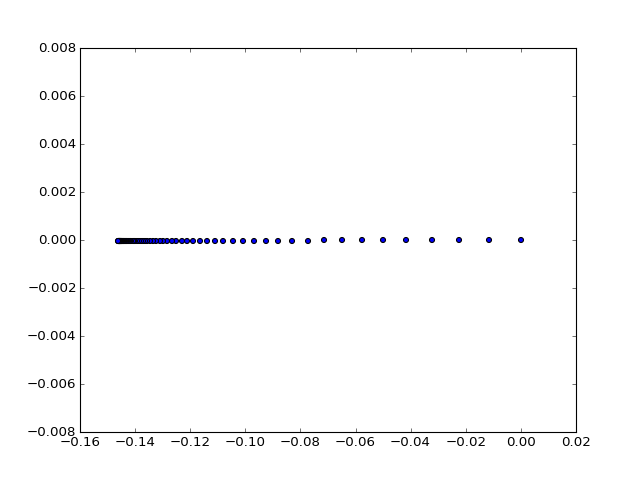

In [231]:
%matplotlib nbagg
plt.clf()
plt.cla()

w_array = np.asarray(w_array)
plt.scatter(w_array[:,0],w_array[:,1])


<IPython.core.display.Javascript object>


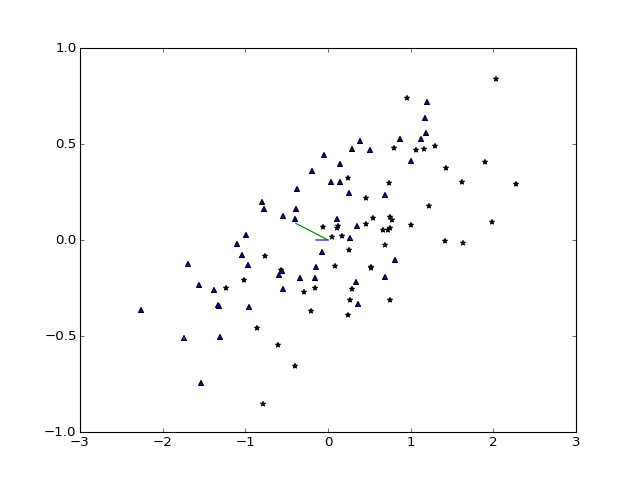

In [232]:
%matplotlib nbagg
plt.clf()
plt.cla()

# print w
x_plot=[w[0], 0]
y_plot=[w[1], 0]
plt.plot(x_plot,y_plot)

# print clf.coef_[0]
x_plot=[clf.coef_[0][0], 0]
y_plot=[clf.coef_[0][1], 0]
plt.plot(x_plot,y_plot)

plt.scatter((X[y==0])[:,0],(X[y==0])[:,1],marker='*')
plt.scatter((X[y==1])[:,0],(X[y==1])[:,1],marker='^')